In [2]:
%run selectors.ipynb
print(len(alldat))

39


In [32]:
# run pca on visual region
# first, get data from that region
# then run pca

# here we use the 11th session
sub = 11
sel = selectors[sub]
vis_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]]

#print(vis_dat.shape)

%run run_PCA.ipynb
%run smt_PCA.ipynb

W, V, variance_explained = run_pca(vis_dat[:,:,51:130])

# project data to pcs
pc_10ms = map_pca(W, V, vis_dat)

# get first two mean pcs and smooth them
n = 2500
pc_smt_ = np.zeros((pc_10ms.shape[0],n))

for i in range(pc_10ms.shape[0]):
    pc_smt = smt_pca(pc_10ms[i].mean(axis = 0),n)
    pc_smt_[i,:] = pc_smt

print(pc_10ms[0][1][51:].shape)

(199,)


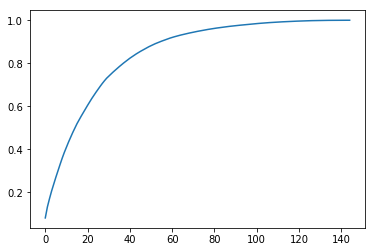

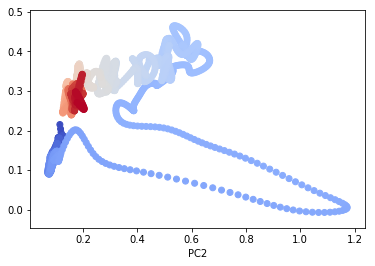

In [33]:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
plt.plot(variance_explained)
plt.show()


plt.scatter(pc_smt_[0], pc_smt_[1], c=np.arange(0,n), cmap=plt.cm.coolwarm)
# pc_smt1 = smt_pca(pc_10ms[0][53],n)
# pc_smt2 = smt_pca(pc_10ms[1][53],n)
# plt.plot(pc_smt1, pc_smt2, 'o-')

plt.xlabel('PC1')
plt.xlabel('PC2')
plt.show()

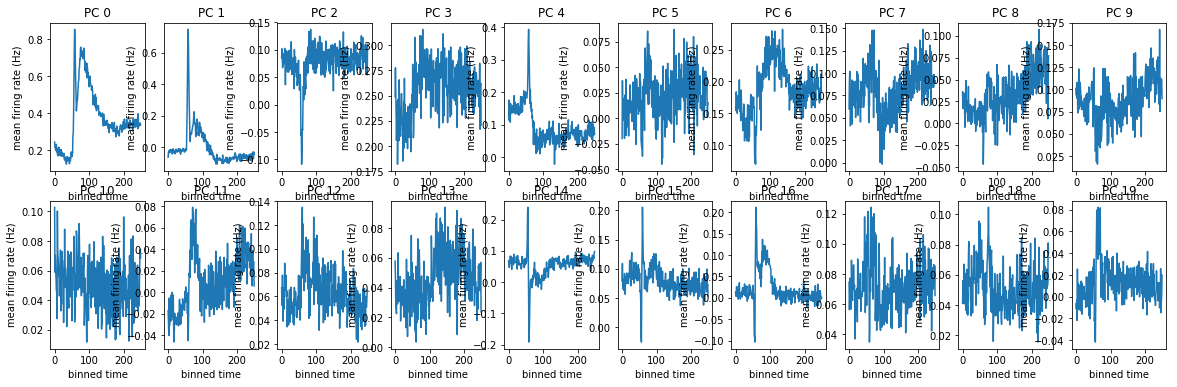

In [30]:
plt.figure(figsize= (20, 6))
for j in range(20):
  ax = plt.subplot(2,10,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1.mean(axis=0))  
  
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

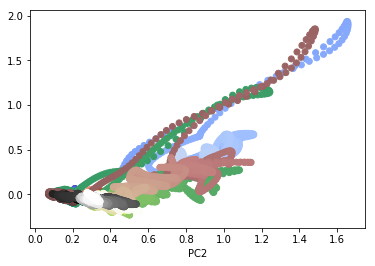

In [31]:
## compare trajectory: right high vs low vs none
stim_right_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]][:, sel["STIM_RIGHT_HIGH"]]
stim_left_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]][:, sel["STIM_RIGHT_LOW"]]
stim_medi_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]][:, sel["STIM_RIGHT_MEDIUM"]]
stim_none_dat = alldat[sub]['spks'][sel["NEURON_VISUAL"]][:, sel["STIM_RIGHT_NONE"]]

pc_10ms_stim_right = map_pca(W, V, stim_right_dat)
pc_10ms_stim_left = map_pca(W, V, stim_left_dat)
pc_10ms_stim_medi = map_pca(W, V, stim_medi_dat)
pc_10ms_stim_none = map_pca(W, V, stim_none_dat)
# get first two mean pcs and smooth them
n = 2500
pc_smt_r_ = np.zeros((pc_10ms_stim_right.shape[0],n))
pc_smt_l_ = np.zeros((pc_10ms_stim_left.shape[0],n))
pc_smt_m_ = np.zeros((pc_10ms_stim_medi.shape[0],n))
pc_smt_n_ = np.zeros((pc_10ms_stim_none.shape[0],n))

for i in range(pc_10ms_stim_right.shape[0]):
    pc_smt = smt_pca(pc_10ms_stim_right[i].mean(axis = 0),n)
    pc_smt_r_[i,:] = pc_smt
    pc_smt = smt_pca(pc_10ms_stim_left[i].mean(axis = 0),n)
    pc_smt_l_[i,:] = pc_smt
    pc_smt = smt_pca(pc_10ms_stim_medi[i].mean(axis = 0),n)
    pc_smt_m_[i,:] = pc_smt
    pc_smt = smt_pca(pc_10ms_stim_none[i].mean(axis = 0),n)
    pc_smt_n_[i,:] = pc_smt
    
plt.scatter(pc_smt_r_[0], pc_smt_r_[1], c=np.arange(0,n), cmap=plt.cm.coolwarm)
plt.scatter(pc_smt_l_[0], pc_smt_l_[1], c=np.arange(0,n), cmap=plt.cm.summer)
plt.scatter(pc_smt_m_[0], pc_smt_m_[1], c=np.arange(0,n), cmap=plt.cm.pink)
plt.scatter(pc_smt_n_[0], pc_smt_n_[1], c=np.arange(0,n), cmap=plt.cm.gist_gray)
# pc_smt1 = smt_pca(pc_10ms[0][53],n)
# pc_smt2 = smt_pca(pc_10ms[1][53],n)
# plt.plot(pc_smt1, pc_smt2, 'o-')

plt.xlabel('PC1')
plt.xlabel('PC2')
plt.show()